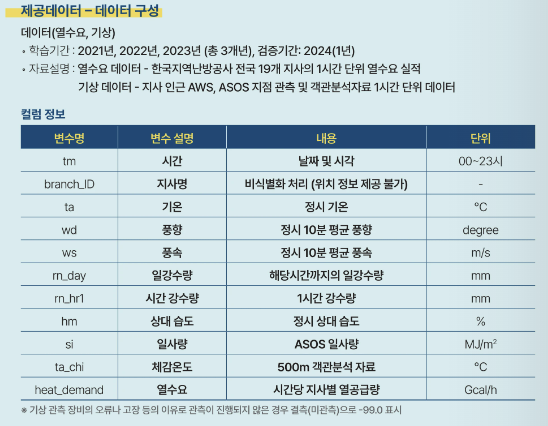

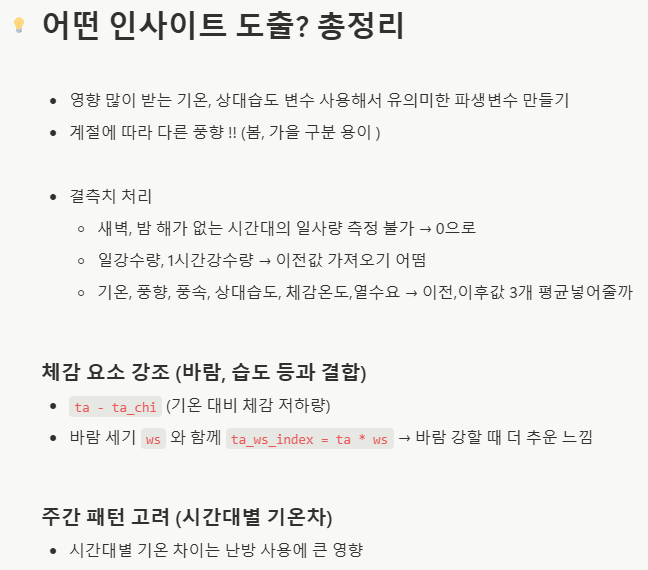

## ÏßÄÏó≠ÎÇúÎ∞© Ïó¥ÏàòÏöîÏôÄ ÎÇ†Ïî® ÎπÖÎç∞Ïù¥ÌÑ∞Î•º ÏúµÌï©Ìïú Ïó¥ÏàòÏöî ÏòàÏ∏°

## Ìå®ÌÇ§ÏßÄ & Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# pip install missingno
import missingno

In [5]:
heat = pd.read_csv("C:/Users/USER/OneDrive/Î∞îÌÉï ÌôîÎ©¥/ÎÇ¥ ÏûêÎ£å/4-1Ï§ÄÎπÑ/Ï≤¥ÌÅ¨ÎÇúÎ∞©/train_heat.csv", index_col=0)
heat

train_heat.tm train_heat.branch_id  train_heat.ta  train_heat.wd  \
1          2021010101                    A          -10.1           78.3   
2          2021010102                    A          -10.2           71.9   
3          2021010103                    A          -10.0          360.0   
4          2021010104                    A           -9.3          155.9   
5          2021010105                    A           -9.0           74.3   
...               ...                  ...            ...            ...   
499297     2023123119                    S            3.2          233.5   
499298     2023123120                    S            2.9          227.4   
499299     2023123121                    S            2.1          360.0   
499300     2023123122                    S            2.2           30.0   
499301     2023123123                    S            1.2          359.0   

        train_heat.ws  train_heat.rn_day  train_heat.rn_hr1  train_heat.hm  \
1                 0.5                0.0                0.0           68.2   
2                 0.6                0.0                0.0           69.9   
3                 0.0                0.0                0.0           69.2   
4                 0.5                0.0                0.0           65.0   
5                 1.9                0.0                0.0           63.5   
...               ...                ...                ...            ...   
499297            0.4                2.5                0.0           91.5   
499298            0.1                2.5                0.0           92.1   
499299            0.0                2.5                0.0           93.3   
499300            1.4                2.5                0.0           95.5   
499301            0.8                2.5                0.0           94.9   

        train_heat.si  train_heat.ta_chi  train_heat.heat_demand  
1               -99.0               -8.2                     281  
2               -99.0               -8.6                     262  
3               -99.0               -8.8                     266  
4               -99.0               -8.9                     285  
5               -99.0               -9.2                     283  
...               ...                ...                     ...  
499297          -99.0                2.8                      34  
499298          -99.0                2.7                      35  
499299          -99.0                1.4                      35  
499300          -99.0                1.3                      40  
499301          -99.0                0.6                      33  

[499301 rows x 11 columns]

In [62]:
# Ïª¨ÎüºÎ™ÖÏóêÏÑú train_heat. Ï†úÍ±∞
heat.columns = heat.columns.str.replace("train_heat.", "", regex=False)
heat.head(2)

tm branch_id    ta    wd   ws  rn_day  rn_hr1    hm    si  ta_chi  \
1  2021010101         A -10.1  78.3  0.5     0.0     0.0  68.2 -99.0    -8.2   
2  2021010102         A -10.2  71.9  0.6     0.0     0.0  69.9 -99.0    -8.6   

   heat_demand  
1          281  
2          262

In [5]:
heat.shape
# 499301Í∞úÏùò Îç∞Ïù¥ÌÑ∞, 11Í∞úÏùò feature

(499301, 11)

In [6]:
heat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499301 entries, 1 to 499301
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   tm           499301 non-null  int64  
 1   branch_id    499301 non-null  object 
 2   ta           499301 non-null  float64
 3   wd           499301 non-null  float64
 4   ws           499301 non-null  float64
 5   rn_day       499301 non-null  float64
 6   rn_hr1       499301 non-null  float64
 7   hm           499301 non-null  float64
 8   si           499301 non-null  float64
 9   ta_chi       499301 non-null  float64
 10  heat_demand  499301 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 45.7+ MB


- object Ï≤òÎ¶¨, Ï†ïÍ∑úÌôî, ÏàòÏπòÏûêÎ£å Ïù¥Ïö© ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±, ÎÇ†ÏßúÎ≥ÄÏàò, Ïù¥ÏÉÅÏπòÌôïÏù∏

In [63]:
# ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞Î•º Îç∞Ïù¥Ìä∏ÌÉÄÏûÑÏúºÎ°ú Î≥ÄÍ≤Ω
heat['tm'] = pd.to_datetime(heat['tm'].astype(str), format="%Y%m%d%H")

In [8]:
heat['tm'] # 2021-01-01Î∂ÄÌÑ∞ 2023-12-31ÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞

1        2021-01-01 01:00:00
2        2021-01-01 02:00:00
3        2021-01-01 03:00:00
4        2021-01-01 04:00:00
5        2021-01-01 05:00:00
                 ...        
499297   2023-12-31 19:00:00
499298   2023-12-31 20:00:00
499299   2023-12-31 21:00:00
499300   2023-12-31 22:00:00
499301   2023-12-31 23:00:00
Name: tm, Length: 499301, dtype: datetime64[ns]

- Í≥ÑÏ†àÏùò ÏòÅÌñ•? (ÏõîÎ≥ÑÎ°ú ÎÇòÎàÑÍ∏∞)
- ÏãúÍ∞ÅÏùò ÏòÅÌñ•? (ÏïÑÏπ®, Ï†êÏã¨, Ï†ÄÎÖÅ ÏãúÍ∞ÑÍ∞Ñ)
- Ïó∞ÎèÑÏùò ÏòÅÌñ•? 

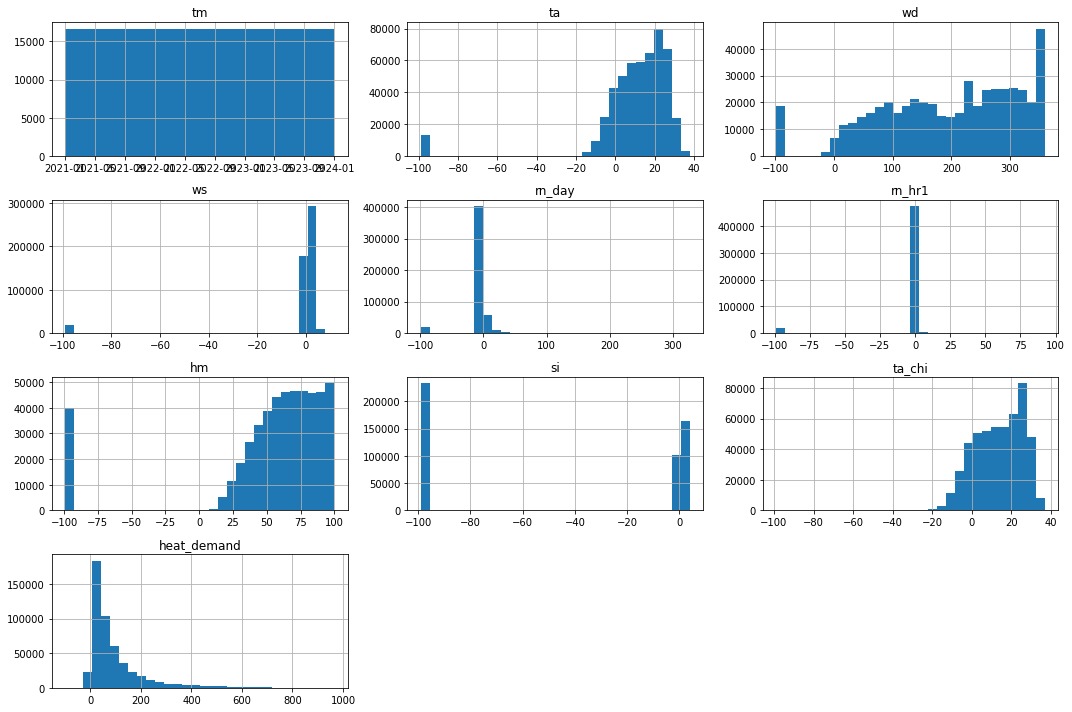

In [9]:
heat.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

- -100Í∑ºÏ≤òÏóêÏÑú Ïù¥ÏÉÅÏπò Í∞íÏù¥ ÎÇòÌÉÄÎÇ® (Í≤∞Ï∏°ÏπòÎ°ú ÌôïÏù∏Îê®)

## Í≤∞Ï∏°Ïπò ÌôïÏù∏
- -99Î°ú Ï†ÄÏû•ÎêòÏñ¥ ÏûàÏùå

In [64]:
len(heat[heat.isin([-99]).any(axis=1)])
# 263069Í∞úÏùò Í≤∞Ï∏°Ïπò -> naÎ°ú ÎåÄÏ≤¥Ìï†Îûò

263069

In [65]:
heat = heat.replace(-99, np.nan)

In [66]:
heat.isnull().sum()

tm                  0
branch_id           0
ta              12997
wd              18815
ws              18815
rn_day          18626
rn_hr1          19154
hm              39717
si             232922
ta_chi             20
heat_demand        23
dtype: int64

In [13]:
# ÎπÑÏú®Î°ú ÌôïÏù∏
heat.isnull().mean()

tm             0.000000
branch_id      0.000000
ta             0.026030
wd             0.037683
ws             0.037683
rn_day         0.037304
rn_hr1         0.038362
hm             0.079545
si             0.466496
ta_chi         0.000040
heat_demand    0.000046
dtype: float64

- siÏóê Ïú†ÎÇúÌûà Í≤∞Ï∏°Ïπò ÎßéÏùå!! -> Ìï¥Í∞Ä Ï†∏ÏûàÎäî ÏãúÍ∞ÑÎåÄ (ÏÉàÎ≤Ω, Î∞§ÏóêÎäî ÏùºÏÇ¨ÎüâÏù¥ ÏóÜÏñ¥ÏÑú nullÍ∞íÏúºÎ°ú ÌïúÎìØ.)

In [22]:
heat[~heat['si'].isnull()]

tm branch_id   ta     wd   ws  rn_day  rn_hr1    hm  \
8      2021-01-01 08:00:00         A -8.6   88.9  1.2     0.0     0.0  63.8   
9      2021-01-01 09:00:00         A -7.4   71.6  1.3     0.0     0.0  61.2   
10     2021-01-01 10:00:00         A -4.7  157.5  0.5     0.0     0.0  50.4   
11     2021-01-01 11:00:00         A -2.6  184.2  0.9     0.0     0.0  41.5   
12     2021-01-01 12:00:00         A -2.2  232.4  1.2     0.0     0.0  46.1   
...                    ...       ...  ...    ...  ...     ...     ...   ...   
499292 2023-12-31 14:00:00         S  4.4  288.7  2.6     2.5     0.0  86.6   
499293 2023-12-31 15:00:00         S  4.4  287.0  2.4     2.5     0.0  86.7   
499294 2023-12-31 16:00:00         S  4.9  302.5  2.2     2.5     0.0  84.8   
499295 2023-12-31 17:00:00         S  4.4  284.1  1.2     2.5     0.0  87.3   
499296 2023-12-31 18:00:00         S  3.5  127.7  0.1     2.5     0.0  89.8   

          si  ta_chi  heat_demand  
8       0.00    -8.4        284.0  
9       0.27    -7.5        290.0  
10      0.76    -5.3        285.0  
11      1.40    -3.1        277.0  
12      1.74    -1.6        269.0  
...      ...     ...          ...  
499292  0.57     2.0         25.0  
499293  0.50     2.6         26.0  
499294  0.31     3.0         29.0  
499295  0.16     4.4         30.0  
499296  0.02     3.5         31.0  

[266379 rows x 11 columns]

In [21]:
heat[499280:] #ÏïÑÏπ®ÏãúÍ∞ÑÎåÄ,Î∞§ÏãúÍ∞ÑÎåÄÎ°ú ÎÇòÌÉÄÎÇ®. 

tm branch_id   ta     wd   ws  rn_day  rn_hr1    hm  \
499281 2023-12-31 03:00:00         S  3.0   60.3  0.8     0.5     0.0  97.9   
499282 2023-12-31 04:00:00         S  2.8  360.0  0.0     0.5     0.0  98.0   
499283 2023-12-31 05:00:00         S  3.8  122.1  0.5     0.5     0.0  98.0   
499284 2023-12-31 06:00:00         S  4.4  127.1  3.3     0.5     0.0  98.0   
499285 2023-12-31 07:00:00         S  4.7  256.7  6.9     2.5     2.0  98.2   
499286 2023-12-31 08:00:00         S  3.3  269.9  3.5     2.5     0.0  98.1   
499287 2023-12-31 09:00:00         S  3.2  282.7  4.5     2.5     0.0  95.6   
499288 2023-12-31 10:00:00         S  3.7  285.9  4.0     2.5     0.0  92.8   
499289 2023-12-31 11:00:00         S  3.9  284.3  3.9     2.5     0.0  88.7   
499290 2023-12-31 12:00:00         S  3.8  288.0  3.0     2.5     0.0  89.1   
499291 2023-12-31 13:00:00         S  4.2  283.0  3.1     2.5     0.0  87.5   
499292 2023-12-31 14:00:00         S  4.4  288.7  2.6     2.5     0.0  86.6   
499293 2023-12-31 15:00:00         S  4.4  287.0  2.4     2.5     0.0  86.7   
499294 2023-12-31 16:00:00         S  4.9  302.5  2.2     2.5     0.0  84.8   
499295 2023-12-31 17:00:00         S  4.4  284.1  1.2     2.5     0.0  87.3   
499296 2023-12-31 18:00:00         S  3.5  127.7  0.1     2.5     0.0  89.8   
499297 2023-12-31 19:00:00         S  3.2  233.5  0.4     2.5     0.0  91.5   
499298 2023-12-31 20:00:00         S  2.9  227.4  0.1     2.5     0.0  92.1   
499299 2023-12-31 21:00:00         S  2.1  360.0  0.0     2.5     0.0  93.3   
499300 2023-12-31 22:00:00         S  2.2   30.0  1.4     2.5     0.0  95.5   
499301 2023-12-31 23:00:00         S  1.2  359.0  0.8     2.5     0.0  94.9   

          si  ta_chi  heat_demand  
499281   NaN     2.7         21.0  
499282   NaN     2.7         20.0  
499283   NaN     3.0         18.0  
499284   NaN     1.8         24.0  
499285   NaN     0.5         30.0  
499286  0.00     0.0         34.0  
499287  0.06    -0.2         36.0  
499288  0.16     0.4         32.0  
499289  0.19     0.6         27.0  
499290  0.18     1.0         30.0  
499291  0.21     1.6         27.0  
499292  0.57     2.0         25.0  
499293  0.50     2.6         26.0  
499294  0.31     3.0         29.0  
499295  0.16     4.4         30.0  
499296  0.02     3.5         31.0  
499297   NaN     2.8         34.0  
499298   NaN     2.7         35.0  
499299   NaN     1.4         35.0  
499300   NaN     1.3         40.0  
499301   NaN     0.6         33.0

### Í∞ïÏàòÎüâ, ÏùºÍ∞ïÏàòÎüâ -> ÏóÜÏñ¥ÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä ÎêòÏóàÎÇò?
#### 0Ïù∏Í±∞Îûë Í≤∞Ï∏°ÏπòÏùò Ï∞®Ïù¥ ÏÇ¥Ìé¥Î≥¥Í∏∞

In [27]:
heat[heat['rn_day']==0]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
1      2021-01-01 01:00:00         A -10.1   78.3  0.5     0.0     0.0  68.2   
2      2021-01-01 02:00:00         A -10.2   71.9  0.6     0.0     0.0  69.9   
3      2021-01-01 03:00:00         A -10.0  360.0  0.0     0.0     0.0  69.2   
4      2021-01-01 04:00:00         A  -9.3  155.9  0.5     0.0     0.0  65.0   
5      2021-01-01 05:00:00         A  -9.0   74.3  1.9     0.0     0.0  63.5   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
499264 2023-12-30 10:00:00         S   0.9   18.3  1.8     0.0     0.0  87.6   
499265 2023-12-30 11:00:00         S   0.9  355.3  0.4     0.0     0.0  89.9   
499266 2023-12-30 12:00:00         S   1.9   65.4  0.6     0.0     0.0  84.0   
499267 2023-12-30 13:00:00         S   1.7  211.3  0.5     0.0     0.0  87.4   
499279 2023-12-31 01:00:00         S   3.2   18.9  0.2     0.0     0.0  97.9   

          si  ta_chi  heat_demand  
1        NaN    -8.2        281.0  
2        NaN    -8.6        262.0  
3        NaN    -8.8        266.0  
4        NaN    -8.9        285.0  
5        NaN    -9.2        283.0  
...      ...     ...          ...  
499264  0.10     0.9         36.0  
499265  0.17     0.9         29.0  
499266  0.19     1.3         35.0  
499267  0.12     1.3         33.0  
499279   NaN     2.8         30.0  

[400989 rows x 11 columns]

In [26]:
heat[heat['rn_day'].isnull()]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
2096   2021-03-29 08:00:00         A   8.3  148.4  0.9     NaN     NaN  89.6   
2097   2021-03-29 09:00:00         A   9.7  144.6  1.3     NaN     NaN  77.8   
2098   2021-03-29 10:00:00         A  11.1  107.2  2.7     NaN     NaN  53.7   
2099   2021-03-29 11:00:00         A  13.1  133.0  2.7     NaN     NaN  39.7   
2100   2021-03-29 12:00:00         A  14.3  121.7  2.8     NaN     NaN  33.3   
...                    ...       ...   ...    ...  ...     ...     ...   ...   
498113 2023-11-12 11:00:00         S   NaN    NaN  NaN     NaN     NaN   NaN   
498114 2023-11-12 12:00:00         S   NaN    NaN  NaN     NaN     NaN   NaN   
498115 2023-11-12 13:00:00         S   NaN    NaN  NaN     NaN     NaN   NaN   
498116 2023-11-12 14:00:00         S   NaN    NaN  NaN     NaN     NaN   NaN   
498192 2023-11-15 18:00:00         S   9.8    NaN  NaN     NaN     NaN  63.2   

          si  ta_chi  heat_demand  
2096    0.34     8.9        145.0  
2097    0.98    10.0        126.0  
2098    1.83    11.5        103.0  
2099    2.58    12.8         97.0  
2100    2.95    13.9         84.0  
...      ...     ...          ...  
498113  1.80     1.7         17.0  
498114  2.11     1.7         15.0  
498115  2.17     2.7         15.0  
498116  2.03     3.1         15.0  
498192  0.01     8.2         21.0  

[18626 rows x 11 columns]

In [33]:
heat[2090:2125]

tm branch_id    ta     wd   ws  rn_day  rn_hr1    hm  \
2091 2021-03-29 03:00:00         A   7.9  154.9  2.4     0.0     0.0  96.5   
2092 2021-03-29 04:00:00         A   7.5  155.3  1.2     0.0     0.0  95.9   
2093 2021-03-29 05:00:00         A   7.7  148.4  0.9     0.0     0.0  95.5   
2094 2021-03-29 06:00:00         A   7.8  161.1  1.1     0.0     0.0  95.3   
2095 2021-03-29 07:00:00         A   7.9  147.3  1.3     0.0     0.0  92.6   
2096 2021-03-29 08:00:00         A   8.3  148.4  0.9     NaN     NaN  89.6   
2097 2021-03-29 09:00:00         A   9.7  144.6  1.3     NaN     NaN  77.8   
2098 2021-03-29 10:00:00         A  11.1  107.2  2.7     NaN     NaN  53.7   
2099 2021-03-29 11:00:00         A  13.1  133.0  2.7     NaN     NaN  39.7   
2100 2021-03-29 12:00:00         A  14.3  121.7  2.8     NaN     NaN  33.3   
2101 2021-03-29 13:00:00         A  13.6  145.8  3.4     NaN     NaN  30.8   
2102 2021-03-29 14:00:00         A  14.2  155.1  3.6     NaN     NaN  29.5   
2103 2021-03-29 15:00:00         A  13.2  124.9  3.2     NaN     NaN  33.0   
2104 2021-03-29 16:00:00         A  13.9  152.6  2.5     NaN     NaN  31.0   
2105 2021-03-29 17:00:00         A  12.1  159.2  2.9     NaN     NaN  35.1   
2106 2021-03-29 18:00:00         A  11.3  151.9  2.6     NaN     NaN  36.5   
2107 2021-03-29 19:00:00         A   9.9  148.0  1.4     NaN     NaN  40.2   
2108 2021-03-29 20:00:00         A   9.4  152.6  1.7     NaN     NaN  43.7   
2109 2021-03-29 21:00:00         A   9.0  138.6  1.6     NaN     NaN  47.9   
2110 2021-03-29 22:00:00         A   8.3  143.5  2.0     NaN     NaN  50.0   
2111 2021-03-29 23:00:00         A   6.4   83.5  0.8     NaN     NaN  61.6   
2112 2021-03-30 00:00:00         A   5.5  138.8  0.5     NaN     NaN  70.3   
2113 2021-03-30 01:00:00         A   4.9  178.0  0.1     0.0     0.0  76.3   
2114 2021-03-30 02:00:00         A   4.6   81.4  0.3     0.0     0.0  78.5   
2115 2021-03-30 03:00:00         A   4.3  360.0  0.0     0.0     0.0  81.8   
2116 2021-03-30 04:00:00         A   4.1   79.8  0.8     0.0     0.0  84.7   
2117 2021-03-30 05:00:00         A   4.1   92.8  0.3     0.0     0.0  77.9   
2118 2021-03-30 06:00:00         A   3.8   75.0  0.3     0.0     0.0  76.2   
2119 2021-03-30 07:00:00         A   4.6  116.0  0.3     0.0     0.0  70.9   
2120 2021-03-30 08:00:00         A   6.6  165.1  0.5     0.0     0.0  66.6   
2121 2021-03-30 09:00:00         A   9.2  100.2  0.4     0.0     0.0  39.4   
2122 2021-03-30 10:00:00         A  12.2  159.2  1.1     0.0     0.0  32.1   
2123 2021-03-30 11:00:00         A  13.6  157.1  1.5     0.0     0.0  26.1   
2124 2021-03-30 12:00:00         A  14.6  120.4  2.6     0.0     0.0  23.8   
2125 2021-03-30 13:00:00         A  16.4  126.1  2.6     0.0     0.0  15.4   

        si  ta_chi  heat_demand  
2091   NaN     8.6         92.0  
2092   NaN     7.7         96.0  
2093   NaN     8.4        113.0  
2094   NaN     8.5        123.0  
2095  0.02     8.5        147.0  
2096  0.34     8.9        145.0  
2097  0.98    10.0        126.0  
2098  1.83    11.5        103.0  
2099  2.58    12.8         97.0  
2100  2.95    13.9         84.0  
2101  2.43    14.2         81.0  
2102  2.61    14.3         80.0  
2103  1.41    13.4         70.0  
2104  1.71    13.6         70.0  
2105  0.75    12.7         70.0  
2106  0.49    12.0         81.0  
2107  0.14    10.9        107.0  
2108   NaN    10.2        112.0  
2109   NaN     9.5        121.0  
2110   NaN     8.9        125.0  
2111   NaN     8.2        123.0  
2112   NaN     7.4        120.0  
2113   NaN     6.7        113.0  
2114   NaN     5.9         99.0  
2115   NaN     5.3         92.0  
2116   NaN     4.8         98.0  
2117   NaN     4.4        125.0  
2118   NaN     4.1        126.0  
2119  0.04     4.4        145.0  
2120  0.49     6.2        151.0  
2121  1.35     9.0        133.0  
2122  2.12    11.4        104.0  
2123  2.77    13.2         85.0  
2124  3.19    14.9         77.0  
2125  3.35    16.2     

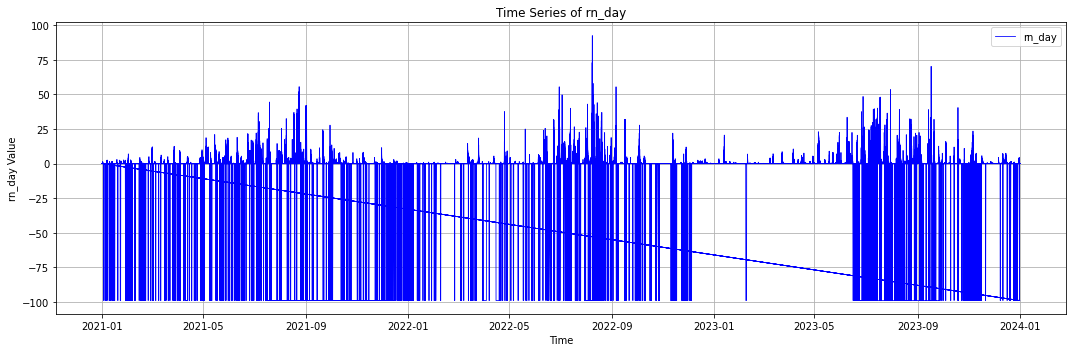

In [40]:
# Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞ #-99ÏùºÎïå Í∑∏Î¶º  
plt.figure(figsize=(15, 5))
plt.plot(heat['tm'], heat['rn_hr1'], label='rn_day', color='blue', linewidth=0.8)

plt.title('Time Series of rn_day')
plt.xlabel('Time')
plt.ylabel('rn_day Value')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Ìå®ÌÑ¥Ïù¥ Î≥¥Ïù¥Îäî Í≤ÉÎèÑ ÏïÑÎãàÍ≥†, 2023ÎÖÑÎèÑÏóêÎßå ÌÖÖ ÎπÑÏñ¥ÏûàÏùå. 
Í∑∏Î¶¨Í≥† 0Ïù∏ Í∞íÏù¥ÎûëÎèÑ Í≥µÏ°¥ÌïòÎäî Í±∞ Î≥¥Î©¥ Í∞ïÏàòÎüâÏù¥ ÏóÜÎäî ÎÇ†ÏùÑ nullÎ°ú ÎÑ£ÏùÄ Í±¥ ÏïÑÎãå Í≤É Í∞ôÏùå -> Í∑∏Îû¨Îã§Î©¥ 0ÏúºÎ°ú ÌñàÍ≤†ÏßÄ
Í∑∏Î†áÎã§Î©¥, nullÍ∞íÏù¥ ÎÇòÏò§Í∏∞ ÏßÅÏ†ÑÏóê ÌòπÏãú Îã§ 0Ïù¥ÎùºÎ©¥ -> Í∑∏ÎÉ• 0ÏúºÎ°ú Ìï¥ÎèÑÎêòÏßÄ ÏïäÏùÑÍπå?

In [56]:
# NaNÏù¥ ÏûàÎäî ÏúÑÏπò Ï∞æÍ∏∞
nan_indices = heat['rn_day'][heat['rn_day'].isnull()].index

# NaN ÏßÅÏ†Ñ Ïù∏Îç±Ïä§ Íµ¨ÌïòÍ∏∞
previous_indices = nan_indices - 1

# Î≤îÏúÑ Î≤óÏñ¥ÎÇòÎäî Ïù∏Îç±Ïä§ Ï†úÍ±∞
previous_indices = previous_indices[previous_indices >= 0]

# NaN Î∞îÎ°ú ÏßÅÏ†Ñ Í∞íÎì§ Î≥¥Í∏∞
heat.loc[previous_indices, ['rn_day']]
heat.loc[previous_indices, 'rn_day'].value_counts()[1:]

rn_day
1.0     23
1.5     14
2.5      9
2.0      9
5.0      7
        ..
64.9     1
1.2      1
3.9      1
12.8     1
44.0     1
Name: count, Length: 68, dtype: int64

<Axes: >

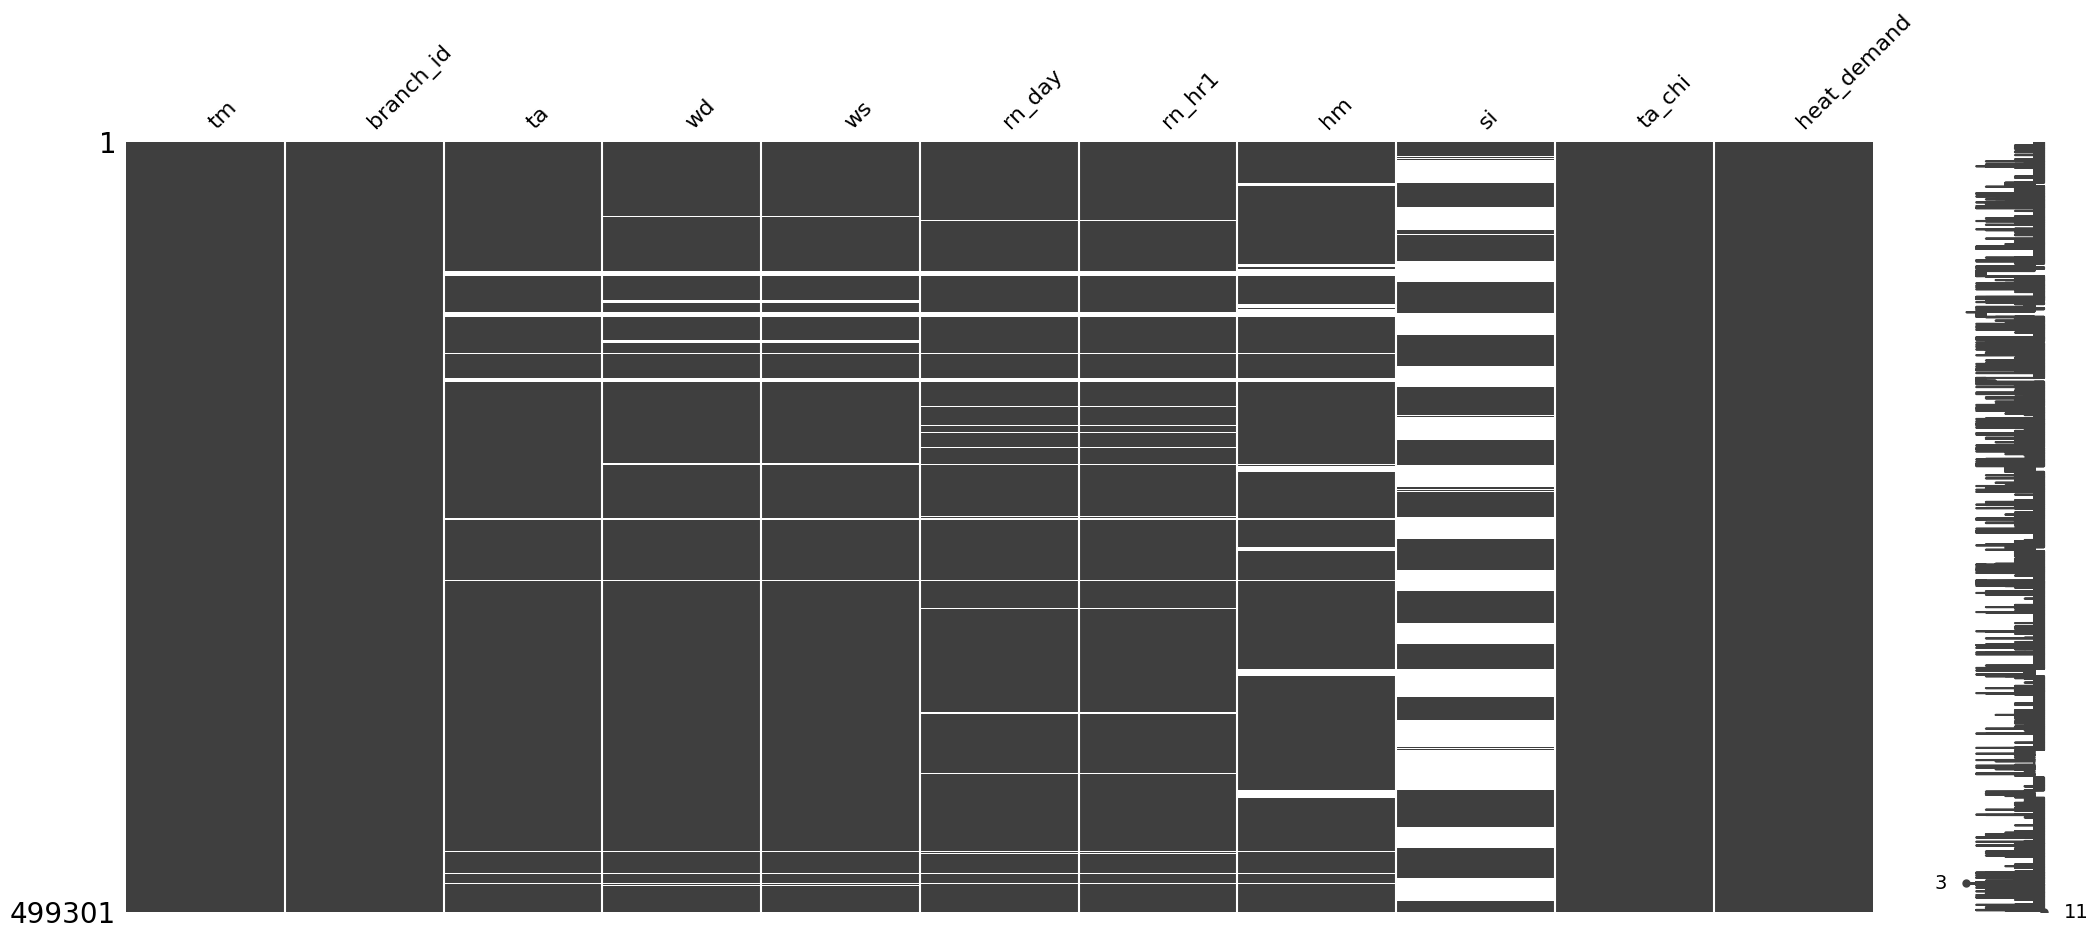

In [ ]:
# ÏãúÍ∞ÅÌôîÎ°ú ÌôïÏù∏
missingno.matrix(heat)

# ÌîºÏ≤ò ÌïòÎÇòÏî© Î≥¥Í∏∞

## branch_id

In [68]:
heat['branch_id'].nunique()
# 19Í∞úÏùò ÏßÄÏÇ¨

19

In [69]:
heat['branch_id'].value_counts()
# Í¥ÄÏ∏°Í∞íÏùò Í∞úÏàòÎäî Î™®Îëê Í∞ôÏùå.

branch_id
A    26279
K    26279
R    26279
Q    26279
P    26279
O    26279
N    26279
M    26279
L    26279
J    26279
B    26279
I    26279
H    26279
G    26279
F    26279
E    26279
D    26279
C    26279
S    26279
Name: count, dtype: int64

## ta (Í∏∞Ïò®)

üìå Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:
count    486304.000000
mean         13.550747
std          10.855174
min         -19.700000
25%           5.200000
50%          14.700000
75%          22.700000
max          37.800000
Name: ta, dtype: float64

üìå Í≤∞Ï∏°Ïπò Í∞úÏàò: 12997


<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:19: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


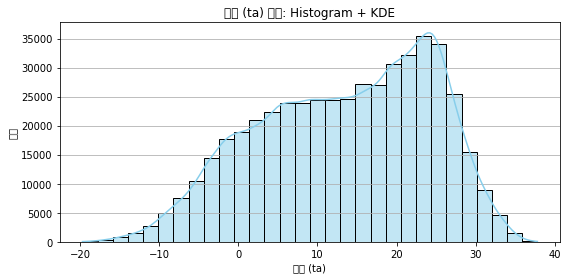

<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 53456 (\N{HANGUL SYLLABLE TAM}) missing from current font.
  plt.tight_layout()
<ipython-input-73-067cb098daee>:26: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylab

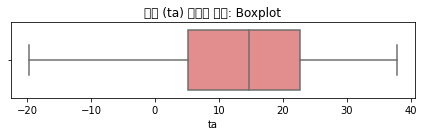

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Í∏∞Î≥∏ ÌÜµÍ≥Ñ ÌôïÏù∏
print("üìå Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ:")
print(heat['ta'].describe())

# 2. Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(f"\nüìå Í≤∞Ï∏°Ïπò Í∞úÏàò: {heat['ta'].isna().sum()}")

# 3. ÌûàÏä§ÌÜ†Í∑∏Îû® + Ïª§ÎÑê Î∞ÄÎèÑ
plt.figure(figsize=(8, 4))
sns.histplot(heat['ta'], kde=True, bins=30, color='skyblue')
plt.title('Í∏∞Ïò® (ta) Î∂ÑÌè¨: Histogram + KDE')
plt.xlabel('Í∏∞Ïò® (ta)')
plt.ylabel('ÎπàÎèÑ')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 4. Î∞ïÏä§ÌîåÎ°Ø (Ïù¥ÏÉÅÏπò ÌÉêÏßÄÏö©)
plt.figure(figsize=(6, 2))
sns.boxplot(x=heat['ta'], color='lightcoral')
plt.title('Í∏∞Ïò® (ta) Ïù¥ÏÉÅÏπò ÌÉêÏßÄ: Boxplot')
plt.tight_layout()
plt.show()

# 5. ÏãúÍ≥ÑÏó¥ ÏãúÍ∞ÅÌôî (ÎÇ†Ïßú Ïª¨ÎüºÏù¥ ÏûàÏùÑ Í≤ΩÏö∞: 'ÎÇ†Ïßú' ÎòêÎäî 'date')
if 'ÎÇ†Ïßú' in heat.columns or 'date' in heat.columns:
    time_col = 'ÎÇ†Ïßú' if 'ÎÇ†Ïßú' in heat.columns else 'date'
    heat[time_col] = pd.to_datetime(heat[time_col])
    heat_sorted = heat.sort_values(by=time_col)

    plt.figure(figsize=(12, 4))
    plt.plot(heat_sorted[time_col], heat_sorted['ta'], color='steelblue')
    plt.title('ÏãúÍ∞ÑÏóê Îî∞Î•∏ Í∏∞Ïò® (ta) Î≥ÄÌôî')
    plt.xlabel('ÏãúÍ∞Ñ')
    plt.ylabel('Í∏∞Ïò® (ta)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\s

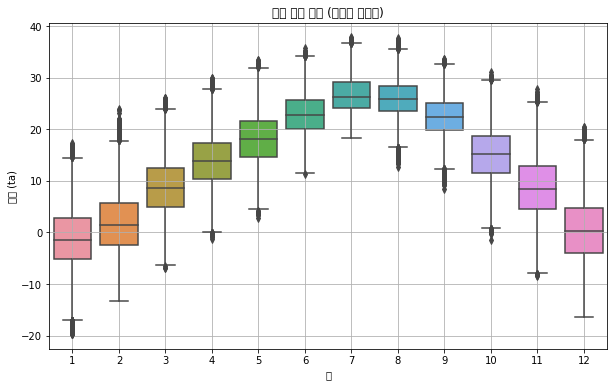

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54253 (\N{HANGUL SYLLABLE POG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50684 (\N{HANGUL SYLLABLE YEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\si

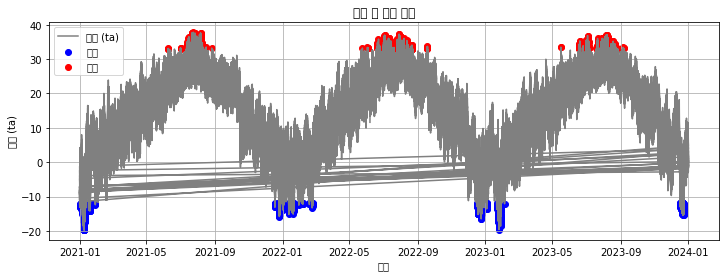

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


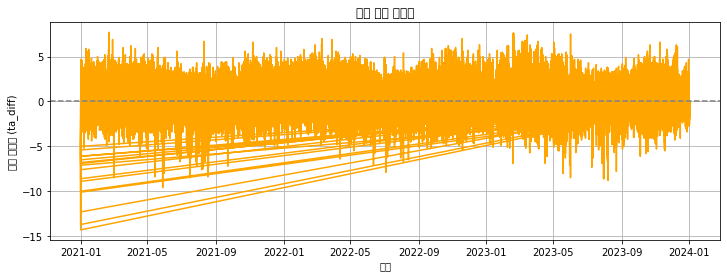

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


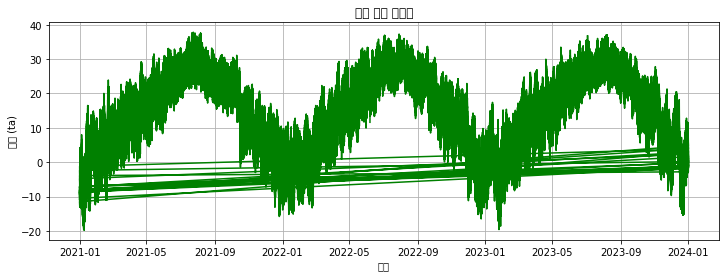

In [75]:
# 2. ÎÇ†Ïßú Í∏∞Î∞ò ÌååÏÉù Ïª¨Îüº
# Ïó∞, Ïõî, Ïùº, Ïãú, Î∂Ñ, Ï¥à Ïª¨Îüº Ï∂îÏ∂ú
heat['year'] = heat['tm'].dt.year
heat['month'] = heat['tm'].dt.month
heat['day'] = heat['tm'].dt.day
heat['hour'] = heat['tm'].dt.hour

# 3. ÏõîÎ≥Ñ Í∏∞Ïò® Î∂ÑÌè¨ (Í≥ÑÏ†àÏÑ± ÌôïÏù∏)
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='ta', data=heat)
plt.title('ÏõîÎ≥Ñ Í∏∞Ïò® Î∂ÑÌè¨ (Í∏∞Ïò®Ïùò Í≥ÑÏ†àÏÑ±)')
plt.xlabel('Ïõî')
plt.ylabel('Í∏∞Ïò® (ta)')
plt.grid(True)
plt.show()

# 4. ÌïúÌåå & Ìè≠Ïóº Ïó¨Î∂Ä ÌååÏÉùÎ≥ÄÏàò ÏÉùÏÑ±
# Í∏∞Ï§Ä: ÌïúÌåå ‚â§ -12ÎèÑ, Ìè≠Ïóº ‚â• 33ÎèÑ (ÌïÑÏöîÏãú Ï°∞Ï†ï)
heat['cold_wave'] = heat['ta'] <= -12
heat['heat_wave'] = heat['ta'] >= 33

# 5. ÌïúÌåå/Ìè≠Ïóº ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 4))
plt.plot(heat['tm'], heat['ta'], label='Í∏∞Ïò® (ta)', color='gray')
plt.scatter(heat.loc[heat['cold_wave'], 'tm'], heat.loc[heat['cold_wave'], 'ta'], color='blue', label='ÌïúÌåå')
plt.scatter(heat.loc[heat['heat_wave'], 'tm'], heat.loc[heat['heat_wave'], 'ta'], color='red', label='Ìè≠Ïóº')
plt.title('ÌïúÌåå Î∞è Ìè≠Ïóº Íµ¨Í∞Ñ')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í∏∞Ïò® (ta)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Ï†ÑÏ≤¥ Í∏∞Ïò® ÏãúÍ≥ÑÏó¥
plt.figure(figsize=(12, 4))
plt.plot(heat['tm'], heat['ta'], label='Í∏∞Ïò® (ta)', color='green')
plt.title('Ï†ÑÏ≤¥ Í∏∞Ïò® ÏãúÍ≥ÑÏó¥')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Í∏∞Ïò® (ta)')
plt.grid(True)
plt.show()

## wd(ÌíçÌñ•)

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


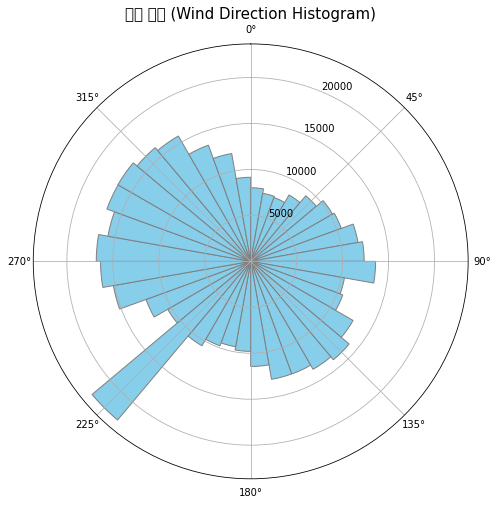

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# wind direction Ïª¨ÎüºÎ™Ö 'wd'Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ï
wind_dir = heat['wd']

# 0~360ÎèÑ Î≤îÏúÑÎ°ú 10ÎèÑ Îã®ÏúÑ Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞
bins = np.arange(0, 370, 10)
wind_dir_bin = pd.cut(wind_dir, bins=bins, right=False)

# Í∞Å Íµ¨Í∞Ñ ÎπàÎèÑ Í≥ÑÏÇ∞ Î∞è Ï†ïÎ†¨
wind_counts = wind_dir_bin.value_counts().sort_index()

# ÎùºÎîîÏïà Í∞ÅÎèÑ Î≥ÄÌôò (Í∞Å Íµ¨Í∞ÑÏùò ÏãúÏûëÍ∞í Í∏∞Ï§Ä)
angles = np.deg2rad(bins[:-1])

# Polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles, wind_counts.values, width=np.deg2rad(10), bottom=0.0, align='edge',
              color='skyblue', edgecolor='gray')

ax.set_theta_zero_location('N')  # 0ÎèÑ(Î∂ÅÏ™Ω)Î•º ÏúÑÎ°ú
ax.set_theta_direction(-1)       # ÏãúÍ≥ÑÎ∞©Ìñ•ÏúºÎ°ú Ï¶ùÍ∞Ä
ax.set_title('ÌíçÌñ• Î∂ÑÌè¨ (Wind Direction Histogram)', fontsize=15)

plt.show()


#### ÏõîÎ≥Ñ ÌíçÌñ• Î∂ÑÌè¨ Í∑∏Î¶¨Í∏∞ (Polar plot)

<ipython-input-80-a54c7442b38d>:34: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  plt.tight_layout()
<ipython-input-80-a54c7442b38d>:34: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-80-a54c7442b38d>:34: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from current font.
  plt.tight_layout()
<ipython-input-80-a54c7442b38d>:34: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
<ipython-input-80-a54c7442b38d>:34: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) m

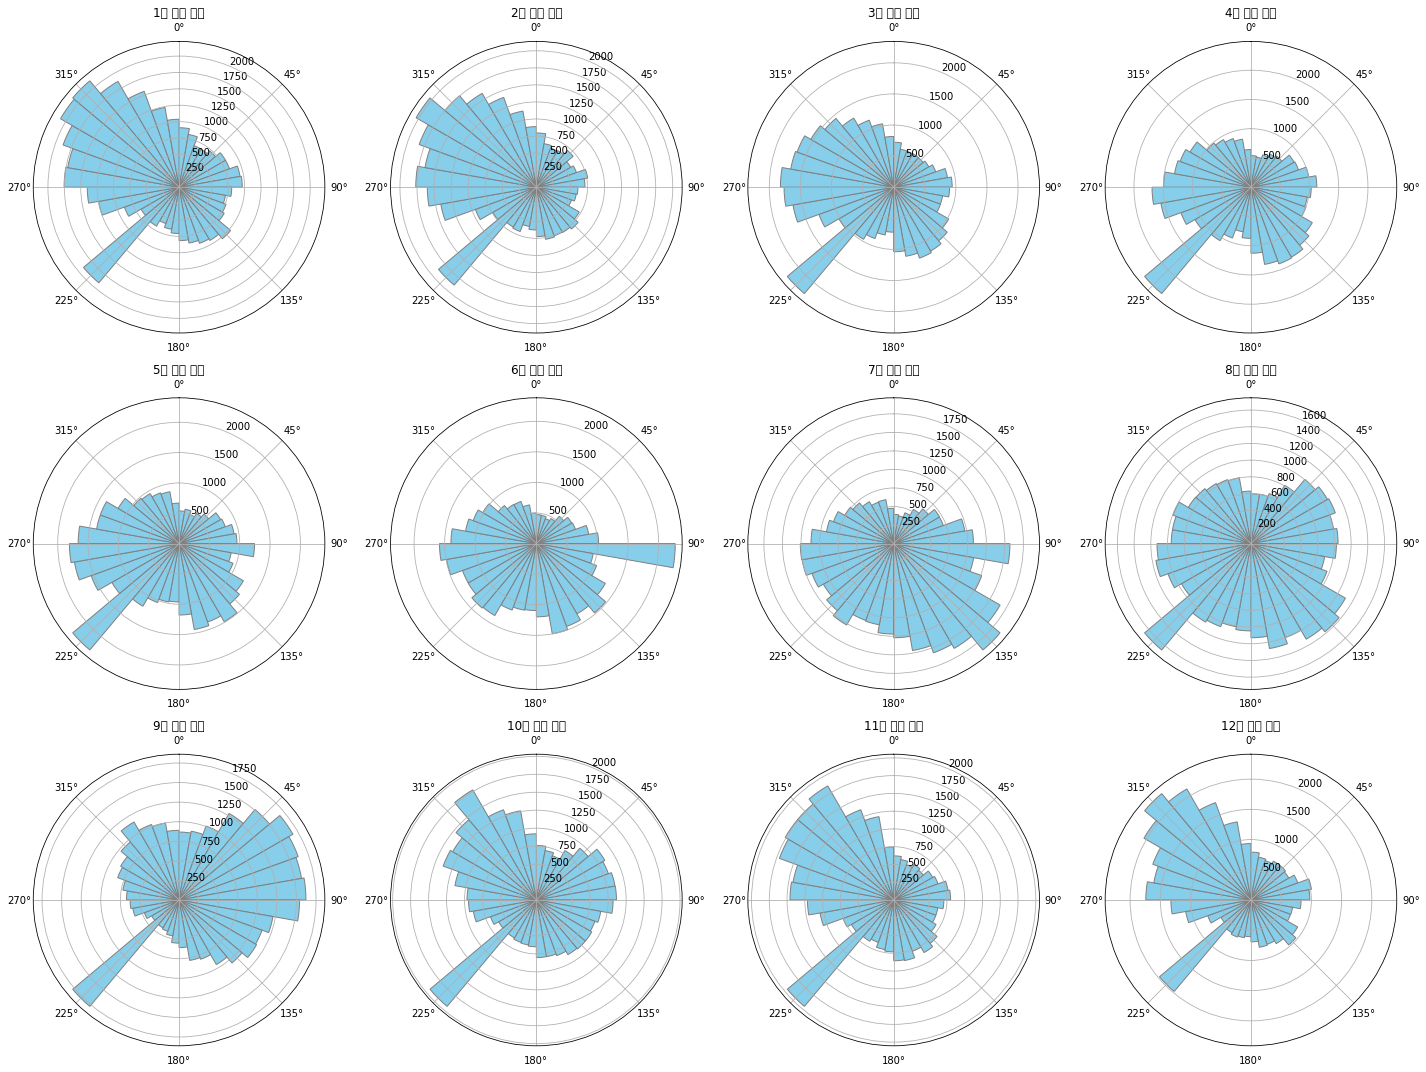

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 10ÎèÑ Îã®ÏúÑ Íµ¨Í∞Ñ ÏÑ§Ï†ï
bins = np.arange(0, 370, 10)

# ÏõîÎ≥Ñ subplot Í∞úÏàò: 12Í∞ú
fig, axes = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': 'polar'})

for month in range(1, 13):
    ax = axes[(month-1)//4, (month-1)%4]
    
    # Ìï¥Îãπ Ïõî Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂ú
    month_data = heat[heat['tm'].dt.month == month]['wd']
    
    # 10ÎèÑ Îã®ÏúÑÎ°ú Íµ¨Í∞Ñ ÎÇòÎàÑÍ∏∞
    wind_dir_bin = pd.cut(month_data, bins=bins, right=False)
    
    # Í∞Å Íµ¨Í∞Ñ ÎπàÎèÑ Í≥ÑÏÇ∞ Î∞è Ï†ïÎ†¨
    wind_counts = wind_dir_bin.value_counts().sort_index()
    
    # ÎùºÎîîÏïà Í∞ÅÎèÑ Î≥ÄÌôò
    angles = np.deg2rad(bins[:-1])
    
    # Polar bar plot
    ax.bar(angles, wind_counts.values, width=np.deg2rad(10), bottom=0.0, align='edge',
           color='skyblue', edgecolor='gray')
    
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title(f'{month}Ïõî ÌíçÌñ• Î∂ÑÌè¨')

plt.tight_layout()
plt.show()


ÎÇ®ÏÑúÌíçÍ≥º ÎÇ®ÎèôÌíçÏùÄ Î¥ÑÍ≥º Ïó¨Î¶ÑÏóê Í∞ïÌï®

Í∞ÄÏùÑÏóêÎäî ÏÑúÌíçÍ≥º ÎÇ®ÏÑúÌíçÏù¥ Í∞ïÌï¥Ïßê

Í≤®Ïö∏ÏóêÎäî ÏÑúÌíçÍ≥º Î∂ÅÏÑúÌíçÏù¥ Ïö∞ÏÑ∏

Í≥ÑÏ†àÏóê Îî∞Îùº ÌíçÌñ• Î∂ÑÌè¨Í∞Ä ÎöúÎ†∑ÌïòÍ≤å Îã¨ÎùºÏßÄÎ©∞, Ïù¥Îäî Í∏∞ÌõÑ ÌäπÏÑ±Í≥º Ïó∞Í¥Ä ÏûàÏùå

ÎÇ®ÏÑúÌíç(225ÎèÑ Î∂ÄÍ∑º)Ïù¥ ÎåÄÎ∂ÄÎ∂Ñ Í≥ÑÏ†àÏóêÏÑú ÎëêÎìúÎü¨ÏßÄÎäî ÌäπÏßï



## ws(ÌíçÏÜç)

count    480486.000000
mean          1.440149
std           1.185264
min           0.000000
25%           0.500000
50%           1.200000
75%           2.100000
max          11.900000
Name: ws, dtype: float64
18815


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\si

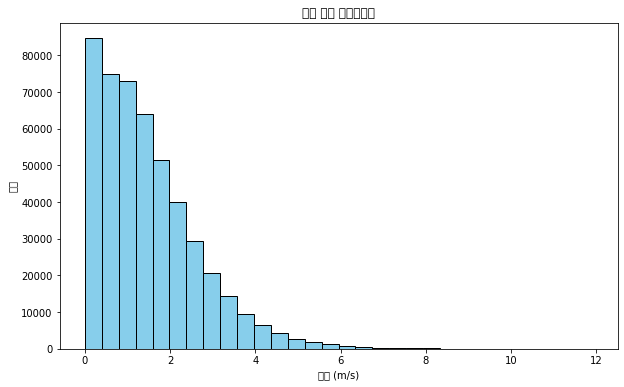

In [82]:
# Í∏∞Î≥∏ ÌÜµÍ≥ÑÎüâ
print(heat['ws'].describe())

# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print(heat['ws'].isnull().sum())

# ÌûàÏä§ÌÜ†Í∑∏Îû®(Î∂ÑÌè¨)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(heat['ws'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('ÌíçÏÜç Î∂ÑÌè¨ ÌûàÏä§ÌÜ†Í∑∏Îû®')
plt.xlabel('ÌíçÏÜç (m/s)')
plt.ylabel('ÎπàÎèÑ')
plt.show()

7Ïù¥ÏÉÅÏù∏Í±¥ 679Í∞ú, 8Ïù¥ÏÉÅÏù∏ Í±¥ 229Í∞ú
8Î∂ÄÌÑ∞Îäî ÌíçÏÜçÏù¥ Îß§Ïö∞ Í∞ïÌïòÎã§Îäî Í≤É. Ïù¥ÏÉÅÏπòÏóê Ìï¥Îãπ (butÏú†ÏùòÎØ∏ÌïòÎãàÍπå.. )

In [103]:
heat['ws'][heat['ws'] > 7]

26422      9.2
26423      8.5
26424      7.9
26428      7.8
26429      8.0
          ... 
497974     8.3
497979     8.0
497980     9.1
497985     7.8
498741    10.2
Name: ws, Length: 679, dtype: float64

### Í∞ïÌíç Î∂ÄÎäî Í∏∞Í∞Ñ Î∂ÑÏÑù

3,6,12ÏõîÏóê Í∞ïÌïú Î∞îÎûåÏù¥ ÎßéÏù¥ Î∂ê.

Í∞ïÌíç Îç∞Ïù¥ÌÑ∞ Ïàò: 258


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\l

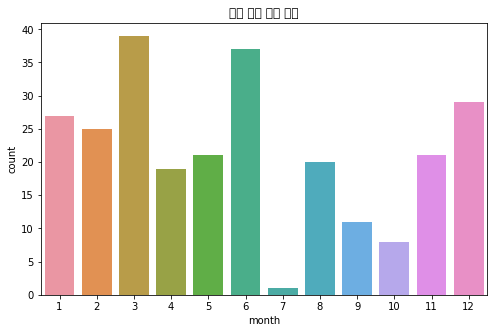

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\li

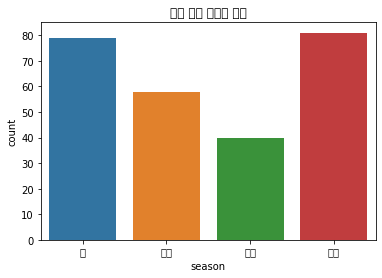

In [106]:
strong_wind = heat[heat['ws'] >= 8]
print(f"Í∞ïÌíç Îç∞Ïù¥ÌÑ∞ Ïàò: {len(strong_wind)}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.countplot(x='month', data=strong_wind)
plt.title('Í∞ïÌíç Î∞úÏÉù ÏõîÎ≥Ñ ÎπàÎèÑ')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='season', data=strong_wind, order=['Î¥Ñ','Ïó¨Î¶Ñ','Í∞ÄÏùÑ','Í≤®Ïö∏'])
plt.title('Í∞ïÌíç Î∞úÏÉù Í≥ÑÏ†àÎ≥Ñ ÎπàÎèÑ')
plt.show()


### Í≥ÑÏ†àÎ≥Ñ ÌíçÏÜç

ÌÅ∞ Ï∞®Ïù¥ ÏóÜÏùå

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\li

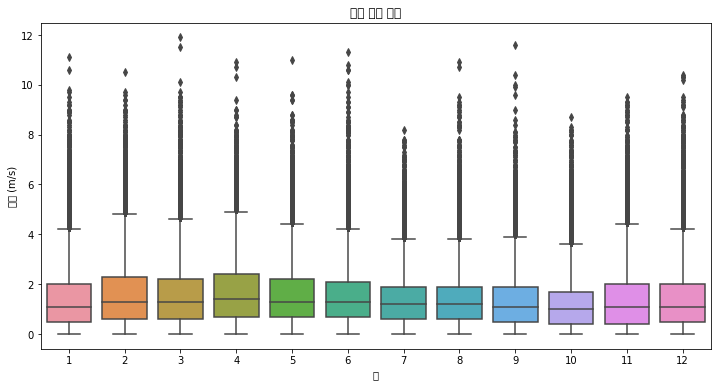

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\li

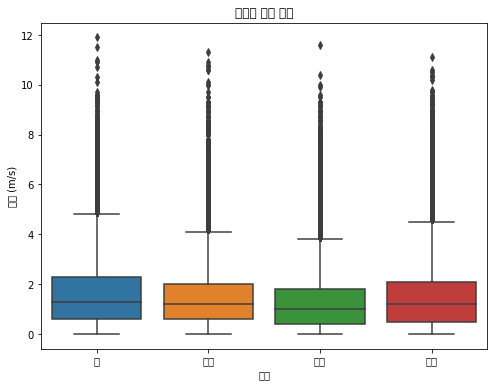

In [105]:
# ÏõîÎ≥Ñ ÌíçÏÜç ÌèâÍ∑†Í≥º Î∂ÑÌè¨
plt.figure(figsize=(12,6))
sns.boxplot(x='month', y='ws', data=heat)
plt.title('ÏõîÎ≥Ñ ÌíçÏÜç Î∂ÑÌè¨')
plt.xlabel('Ïõî')
plt.ylabel('ÌíçÏÜç (m/s)')
plt.show()

# Í≥ÑÏ†à Ïª¨Îüº(Ïù¥ÎØ∏ ÏûàÏúºÎ©¥ Ìå®Ïä§)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Í≤®Ïö∏'
    elif month in [3, 4, 5]:
        return 'Î¥Ñ'
    elif month in [6, 7, 8]:
        return 'Ïó¨Î¶Ñ'
    else:
        return 'Í∞ÄÏùÑ'
heat['season'] = heat['tm'].dt.month.apply(get_season)

# Í≥ÑÏ†àÎ≥Ñ ÌíçÏÜç Î∞ïÏä§ÌîåÎ°Ø
plt.figure(figsize=(8,6))
sns.boxplot(x='season', y='ws', data=heat, order=['Î¥Ñ','Ïó¨Î¶Ñ','Í∞ÄÏùÑ','Í≤®Ïö∏'])
plt.title('Í≥ÑÏ†àÎ≥Ñ ÌíçÏÜç Î∂ÑÌè¨')
plt.xlabel('Í≥ÑÏ†à')
plt.ylabel('ÌíçÏÜç (m/s)')
plt.show()


## hm(ÏÉÅÎåÄÏäµÎèÑ)

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\s

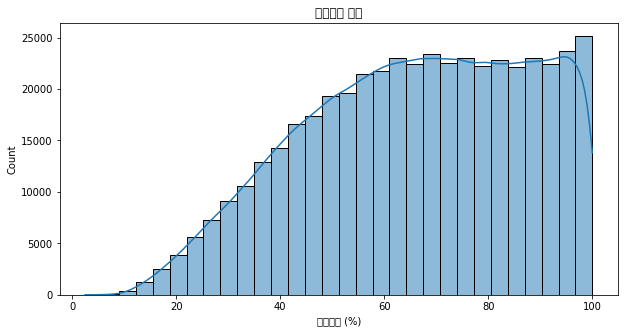

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=heat, x='hm', bins=30, kde=True)
plt.title('ÏÉÅÎåÄÏäµÎèÑ Î∂ÑÌè¨')
plt.xlabel('ÏÉÅÎåÄÏäµÎèÑ (%)')
plt.show()


c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\si

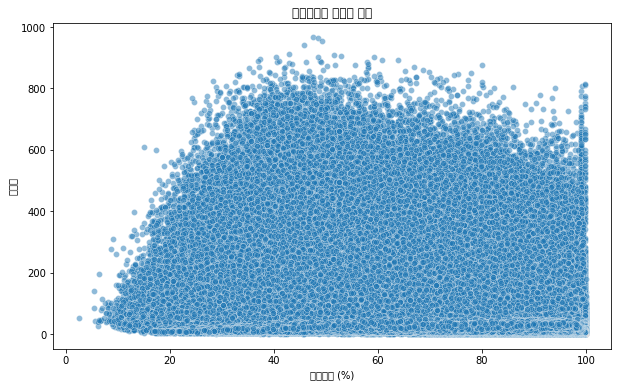

In [113]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heat, x='hm', y='heat_demand', alpha=0.5)
plt.title('ÏÉÅÎåÄÏäµÎèÑÏôÄ Ïó¥ÏàòÏöî Í¥ÄÍ≥Ñ')
plt.xlabel('ÏÉÅÎåÄÏäµÎèÑ (%)')
plt.ylabel('Ïó¥ÏàòÏöî')
plt.show()


## ta_chi(Ï≤¥Í∞êÏò®ÎèÑ)

<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
<ipython-input-119-e515aeff5235>:11: UserWarning: Gly

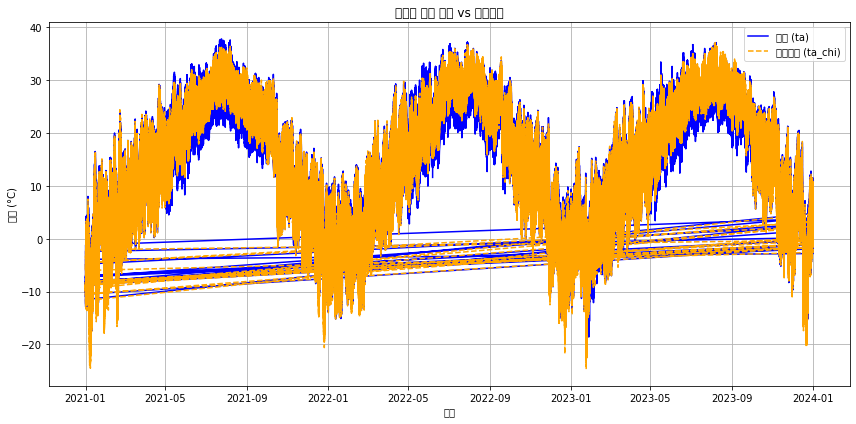

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(heat['tm'], heat['ta'], label='Í∏∞Ïò® (ta)', color='blue')
plt.plot(heat['tm'], heat['ta_chi'], label='Ï≤¥Í∞êÏò®ÎèÑ (ta_chi)', color='orange', linestyle='--')
plt.title('ÏãúÍ∞ÑÏóê Îî∞Î•∏ Í∏∞Ïò® vs Ï≤¥Í∞êÏò®ÎèÑ')
plt.xlabel('ÎÇ†Ïßú')
plt.ylabel('Ïò®ÎèÑ (¬∞C)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Ï£ºÎ°ú 5-9ÏõîÏóê Ï≤¥Í∞êÏò®ÎèÑÏôÄ Ïã§Ï†ú Ïò®ÎèÑÏôÄ ÎßéÏùÄ Ï∞®Ïù¥Î•º Î≥¥ÏûÑ (Ïó¨Î¶Ñ)

## heat_demand(Ïó¥ÏàòÏöî_target)

<ipython-input-121-19c4c83cca6d>:9: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
<ipython-input-121-19c4c83cca6d>:9: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
<ipython-input-121-19c4c83cca6d>:9: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  plt.tight_layout()
<ipython-input-121-19c4c83cca6d>:9: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
<ipython-input-121-19c4c83cca6d>:9: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing fr

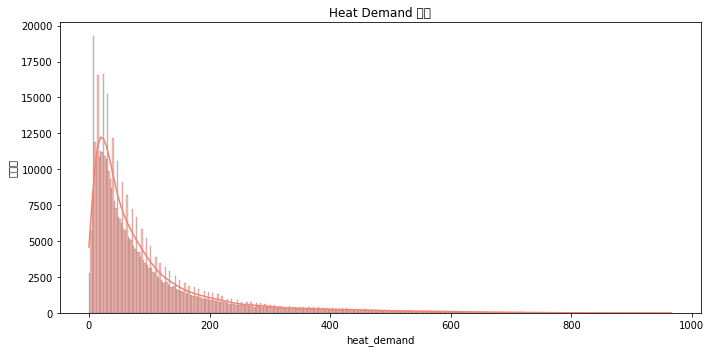

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(heat['heat_demand'], kde=True, color='salmon')
plt.title('Heat Demand Î∂ÑÌè¨')
plt.xlabel('heat_demand')
plt.ylabel('ÎπàÎèÑÏàò')
plt.tight_layout()
plt.show()


<ipython-input-122-eddacd58bdb4>:6: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-122-eddacd58bdb4>:6: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


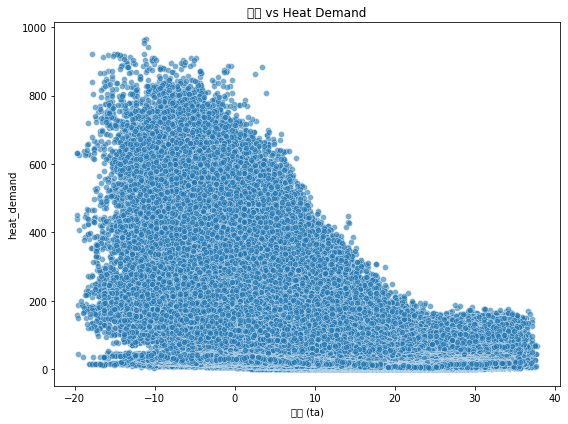

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=heat, x='ta', y='heat_demand', alpha=0.6)
plt.title('Í∏∞Ïò® vs Heat Demand')
plt.xlabel('Í∏∞Ïò® (ta)')
plt.ylabel('heat_demand')
plt.tight_layout()
plt.show()


Í∏∞Ïò®Ïù¥ -20‚ÑÉÏóêÏÑú 0‚ÑÉ ÏÇ¨Ïù¥Ïùº ÎïåÎäî Ïó¥ÏàòÏöîÍ∞Ä ÏµúÎåÄ 800~900 Ïù¥ÏÉÅÍπåÏßÄ Ïò¨ÎùºÍ∞ê.

Í∏∞Ïò®Ïù¥ 15~20‚ÑÉ Ïù¥ÏÉÅÏù¥ ÎêòÎ©¥, Ïó¥ÏàòÏöîÎäî Í±∞Ïùò 100 Ïù¥Ìïò ÏàòÏ§ÄÏúºÎ°ú Îñ®Ïñ¥Ïßê.

<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 50728 (\N{HANGUL SYLLABLE ON}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 44480 (\N{HANGUL SYLLABLE GWI}) missing from current font.
  plt.tight_layout()
<ipython-input-123-d0743e058074>:6: UserWarning: Glyph 526

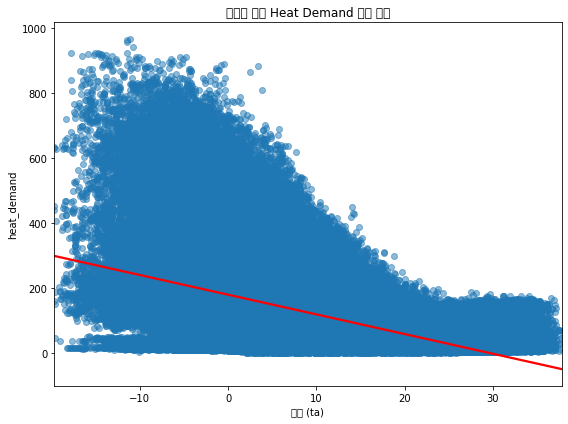

In [123]:
plt.figure(figsize=(8,6))
sns.regplot(data=heat, x='ta', y='heat_demand', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Í∏∞Ïò®Ïóê Îî∞Î•∏ Heat Demand ÌöåÍ∑Ä Ï∂îÏÑ∏')
plt.xlabel('Í∏∞Ïò® (ta)')
plt.ylabel('heat_demand')
plt.tight_layout()
plt.show()


Î≥¥Î©¥ÏÑú Îì† ÏÉùÍ∞ÅÏùÄ ÏÉÅÏãùÏ†ÅÏúºÎ°ú Í≤®Ïö∏Ïóî Ïó¥ÏàòÏöîÍ∞Ä ÎßéÍ≥† Ïó¨Î¶ÑÏóî Ï†ÅÏùÑ Í≤ÉÏûÑ.

Î¥ÑÍ≥º Í∞ÄÏùÑÏóêÏÑú ÎìúÎü¨ÎÇòÎäî ÎØ∏ÏÑ∏Ìïú ÌäπÏßïÎì§ÏùÑ Ïû°ÏïÑÎÇ¥Î©¥ Îçî Ï†ïÍµêÌï¥Ïßà Ïàò ÏûàÏùÑ Í≤É Í∞ôÏùå. 

ÏãúÍ∞ÑÏóê

c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\USER\anaconda3\lib\si

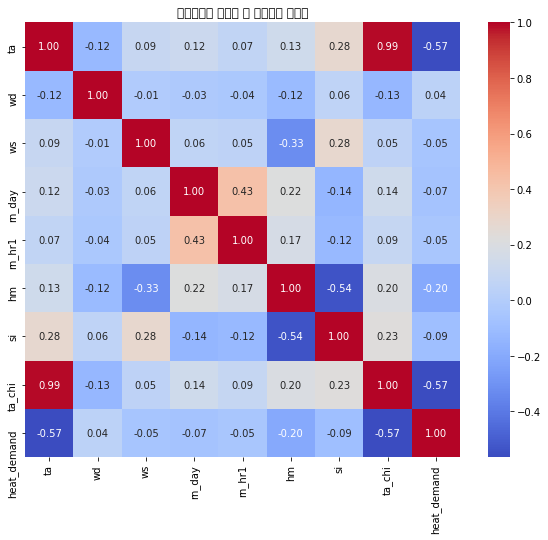

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Í≥ÑÏÇ∞
corr = heat[['ta', 'wd', 'ws', 'rn_day', 'rn_hr1', 'hm', 'si', 'ta_chi', 'heat_demand']].corr()

# ÌûàÌä∏Îßµ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Í∏∞ÏÉÅÎ≥ÄÏàòÏôÄ Ïó¥ÏàòÏöî Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌûàÌä∏Îßµ")
plt.show()


Í∏∞Ïò®Ïù¥Îûë ÏÉÅÎåÄÏäµÎèÑÍ∞Ä Ïó¥ÏàòÏöîÏóê Í∞ÄÏû• ÎßéÏùÄ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®.